In [29]:
import numpy as np 
import pandas as pd
from plotnine import *


**Task 1**
**1.**
The aesthetics are: x = income, y= life expectancy.
The geometry used is a scatter plot with geom_point(). The bubble size represents population size. The color =shows world region. The data is from 2010, (this changes with the interactive graph.)

In [30]:
region_colors = {
'africa': '#04e2d7',   
'americas': '#41e30a', 
'asia': '#f54174',     
'europe': '#f1e72d'    
}

In [31]:
#2
q1= pd.read_csv("/Users/alexandra/Desktop/GSB-544/Labs/Lab1/Data_Lab1/q1data (1).csv")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/plotnine/scales/scale.py:130: PlotnineWarning: scale_x_log10 could not recognise parameter `lables`
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_text : Removed 1 rows containing missing values.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 11 rows containing missing values.


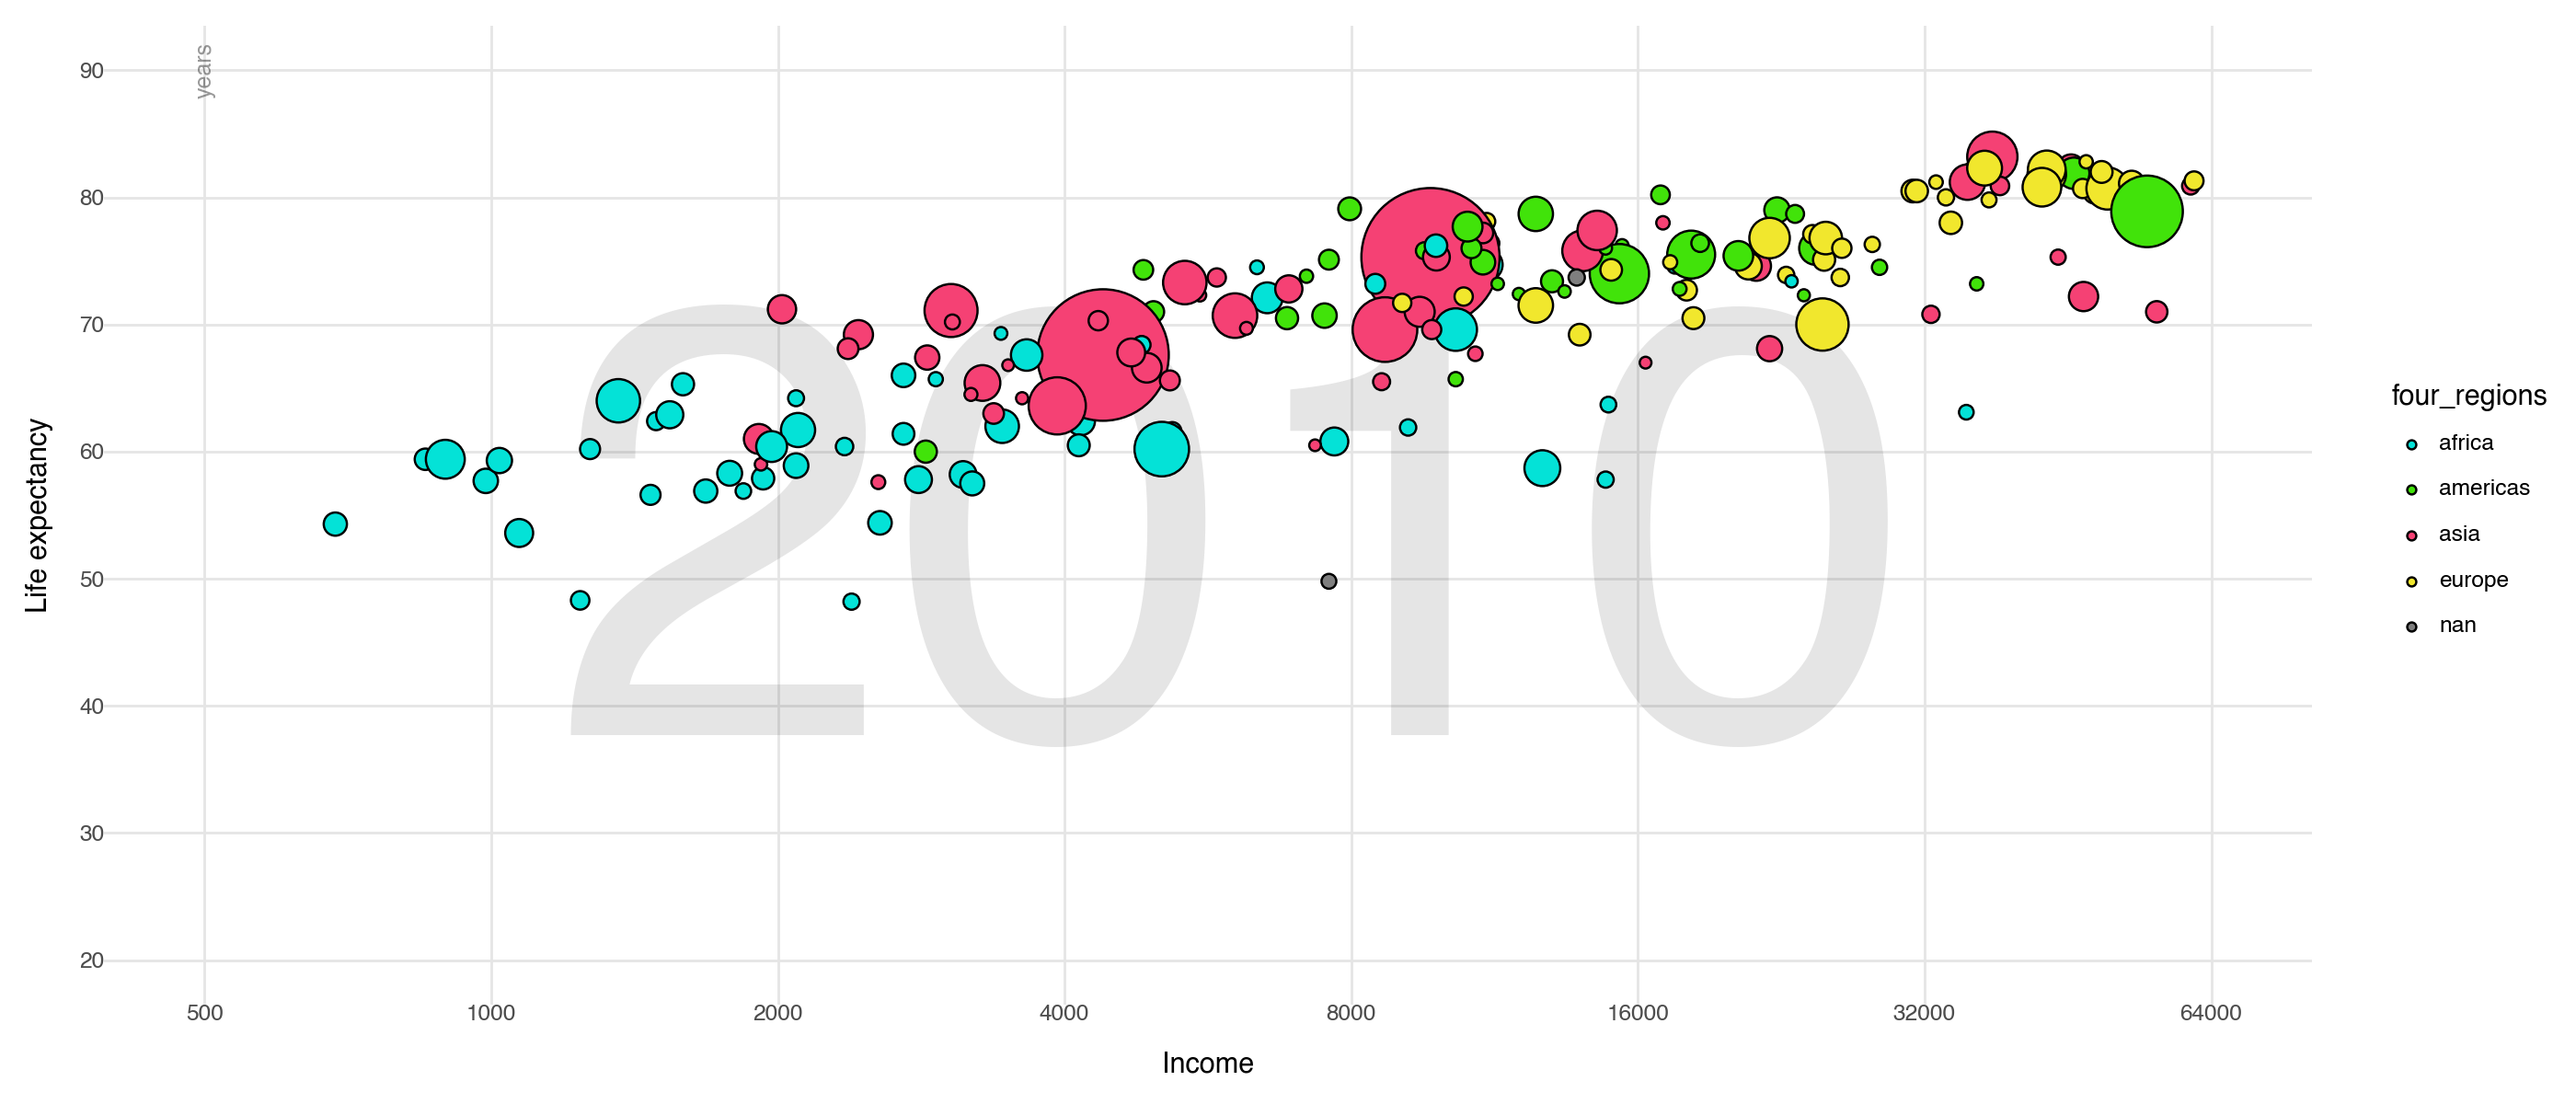

In [33]:

#3
(ggplot(q1, 
aes(x = "income",
  y = "life_exp",
  size = "population",
  fill= "four_regions"
  ))
+annotate("text", x=6000, y =50, label="2010", size=240, color = "black", alpha=0.1)
+annotate("text", x=500, y=90, label="years", size = 9, color= "black", alpha = .4, angle=90)
+annotate("text", x=400, y =60, label="Income Level 1     *      Level 2          *         Level 3           *           Level 4       ", size=10, color = "black", alpha=0.3)
+guides(size=False)
+ geom_point()
+ ylab("Life expectancy")
+ xlab("Income")
+theme_minimal()
+ theme(figure_size=(14, 6), panel_grid_minor=element_blank())
#+ theme((figure_size =(14,6), panel_grid_minor = element_blank()))
+scale_fill_manual(values=region_colors)
+scale_x_log10(breaks=[ 500,1000,2000,4000,8000,16000,32000,64000], limits = (500,64000),
lables= ['1000','2000',"4000",'8000', '16k', '32k', '64k']
) 
+scale_y_continuous(breaks=[20,30,40,50,60,70,80,90], limits = (20,90))
+scale_size(range=(2,30))
)

#4 Making a density plot

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_density : Removed 2 rows containing non-finite values.


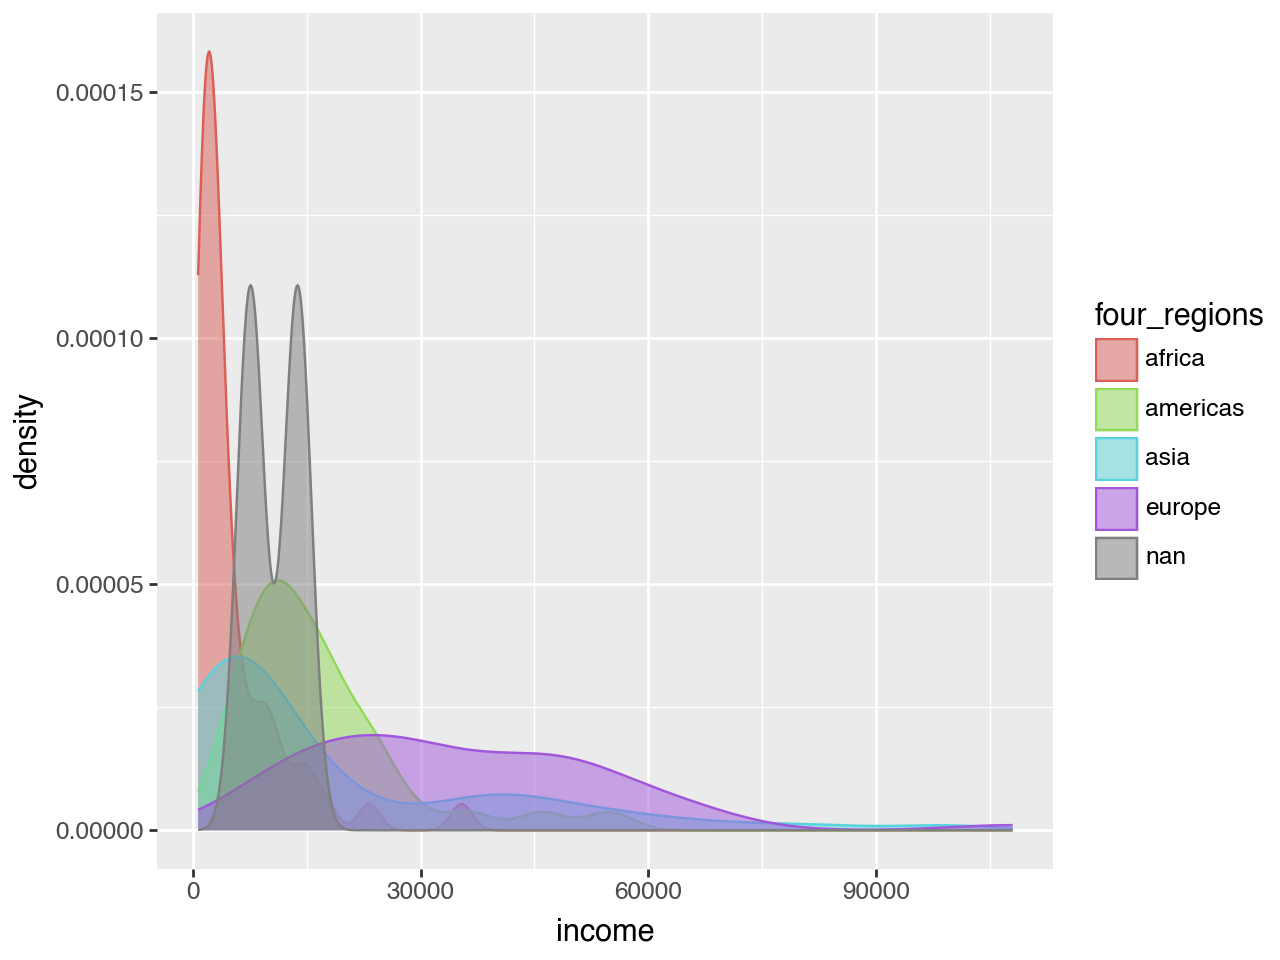

In [63]:
(ggplot(q1, 
aes(x = "income", 
    size = "population", 
    color = "four_regions",
    fill="four_regions"
  
))
+ geom_density(alpha=0.5)
+

)

#I created a density plot. It is not representative for the y variable, life expectancy. The graph is hard to read and the y axis not representative of meaningful information because it only shows whatever number would be needed for the area under each curve to be equal to 1. 


A density plot is not a good representation of the catergical variables. It is hard to visualize especially compared to a scatter plot. 

**Task 2**
**1.**
The aesthetics are: x= exports of GDP , y= imports of GDP.
The geometry used is a scatter plot with geom_point(). The bubble size represents energy use. The color =shows world region. The data is from 1997, (this changes with the interactive graph.)

In [42]:
#2
q2= pd.read_csv("/Users/alexandra/Desktop/GSB-544/Labs/Lab1/Data_Lab1/q2data.csv")

In [25]:
region_colors = {
'africa': '#04e2d7',   
'americas': '#41e30a', 
'asia': '#f54174',     
'europe': '#f1e72d'    
}


In [43]:
q2.head
#remove the k thousands numbers
q2['energy']= q2['energy'].str.replace('k','').astype(float) *1000
q2['energy']= q2['energy'].astype(float)

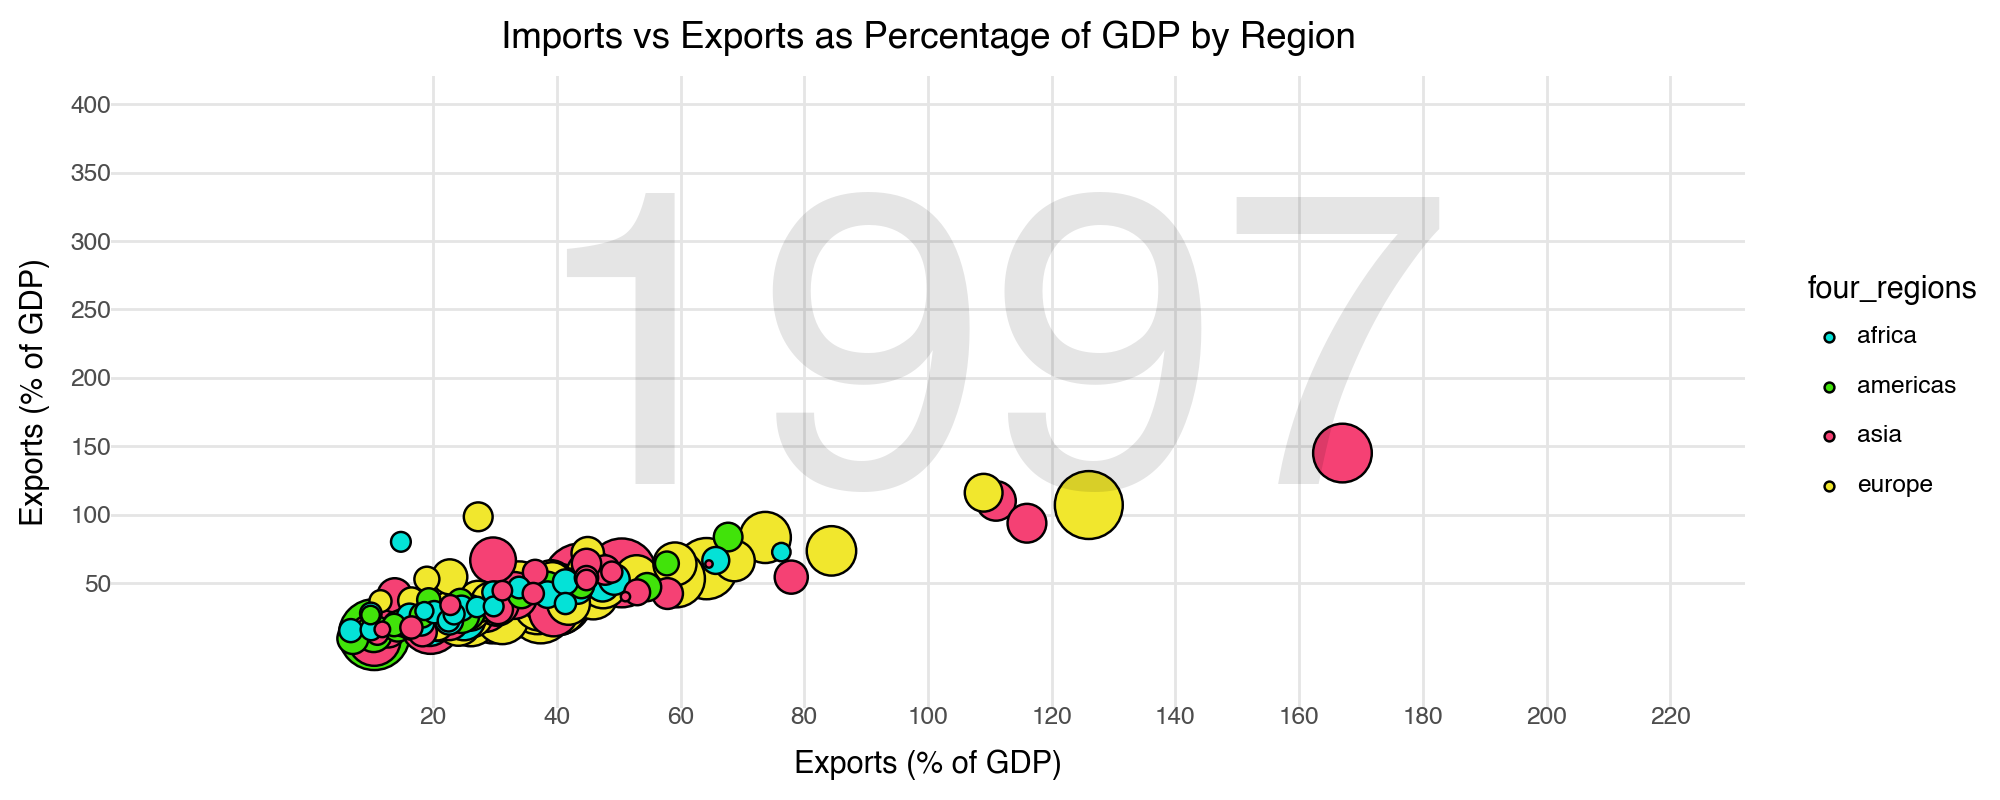

In [28]:
#3
q2 = q2.sort_values(by='energy', ascending=False)

q2= q2.dropna()
(ggplot(q2, 
aes(x = "exports",
  y = "imports",
  size = "energy",
  fill= "four_regions"
  ))
+ geom_point(alpha=1)
+theme_minimal()
+ theme(figure_size = (10,4), panel_grid_minor = element_blank())
+scale_fill_manual(values=region_colors)
+annotate("text", x=110, y =200, label="1997", size=150, color = "black", alpha=0.1)
+ xlab("Exports (% of GDP)")
+ ylab("Exports (% of GDP)")
+guides(size=False)
+scale_x_continuous(breaks=[20,40,60,80,100,120,140,160, 180, 200,220], limits = (-20,220)
)
+scale_y_continuous(breaks=[50,100,150,200,250,300,350,400], limits = (-20,400))
+scale_size(range=(1,15))
+labs(title = 'Imports vs Exports as Percentage of GDP by Region', size='Energy Use', color='Region')
)


Creating a new

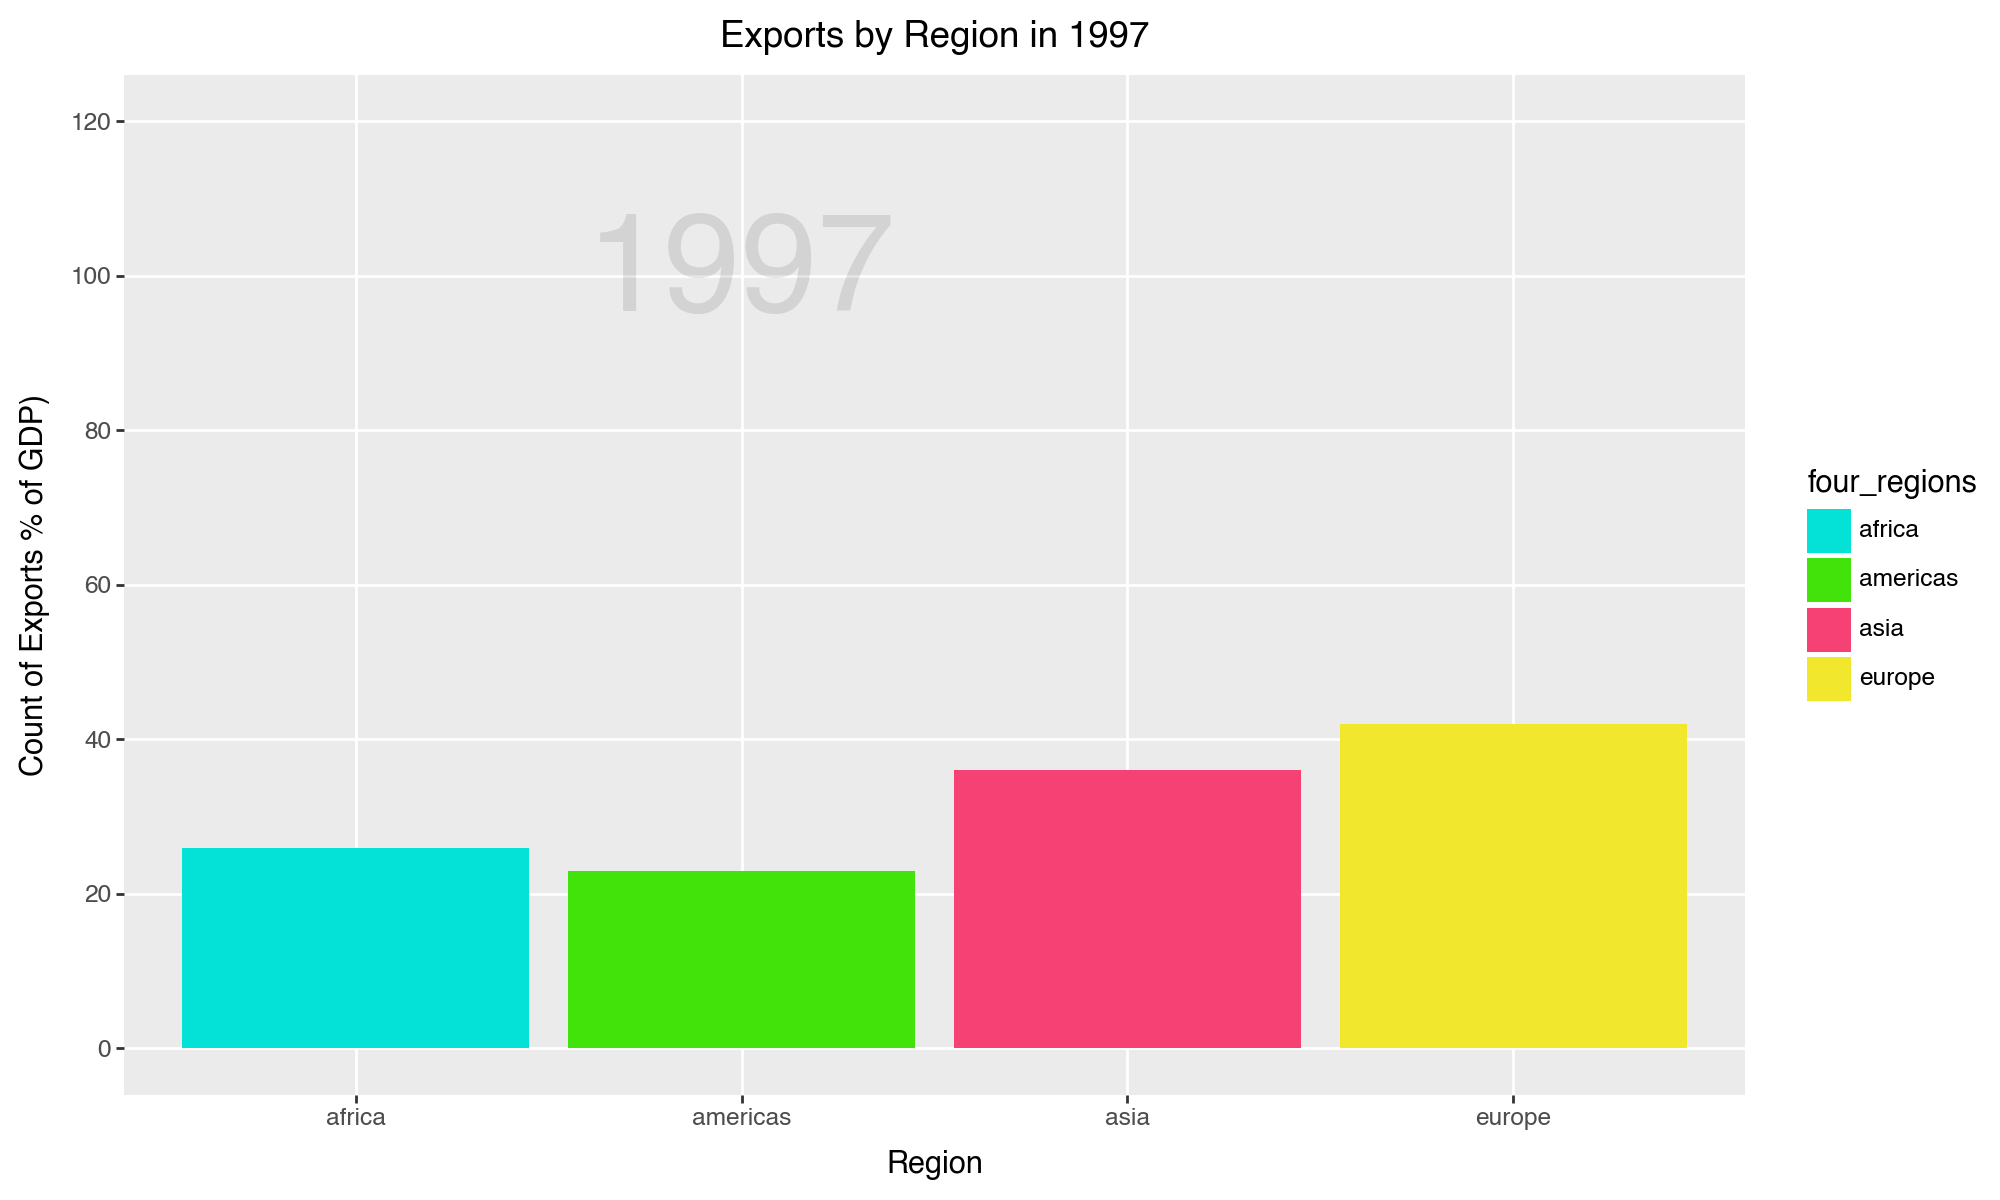

In [49]:

#4
q2["four_regions"] = q2["four_regions"].astype(str)
q2 = q2.dropna()

(ggplot(q2, 
aes(x="four_regions",
    fill="four_regions"))
 + geom_bar() 
 + theme(figure_size=(10, 6), panel_grid_minor=element_blank())
 + scale_fill_manual(values=region_colors) 
 + xlab("Region")
 + ylab("Count of Exports % of GDP)")
 + annotate("text", x=2, y=100, label="1997", size=50, color="black", alpha=0.1)
 + scale_y_continuous(breaks=[0, 20, 40, 60, 80, 100, 120], limits=(0, 120))
 + labs(title='Exports by Region in 1997')
)

In [47]:
q2.dtypes

imports              float64
exports              float64
energy               float64
year                   int64
country               object
four_regions          object
six_regions           object
eight_regions         object
world_bank_region     object
dtype: object

It is easy to visulaize by region which has the highest export % of GDP. However it completely leaves out Import % of GDP. 

**Task 3**
**1.**
The aesthetics are: x= Individual Internet Users , y= GDP/capita,
The geometry used is a scatter plot with geom_point(). The bubble size represents income. The color =shows world region. The data is from 2001, (this changes with the interactive graph.).
**I used chat gpt help me learn how to adjust the scale of the grapgh to make it represent that data better, and more like the original graph.

In [35]:
#2
q3= pd.read_csv("/Users/alexandra/Desktop/GSB-544/Labs/Lab1/Data_Lab1/q3data.csv")



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 1 rows containing missing values.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_text : Removed 1 rows containing missing values.


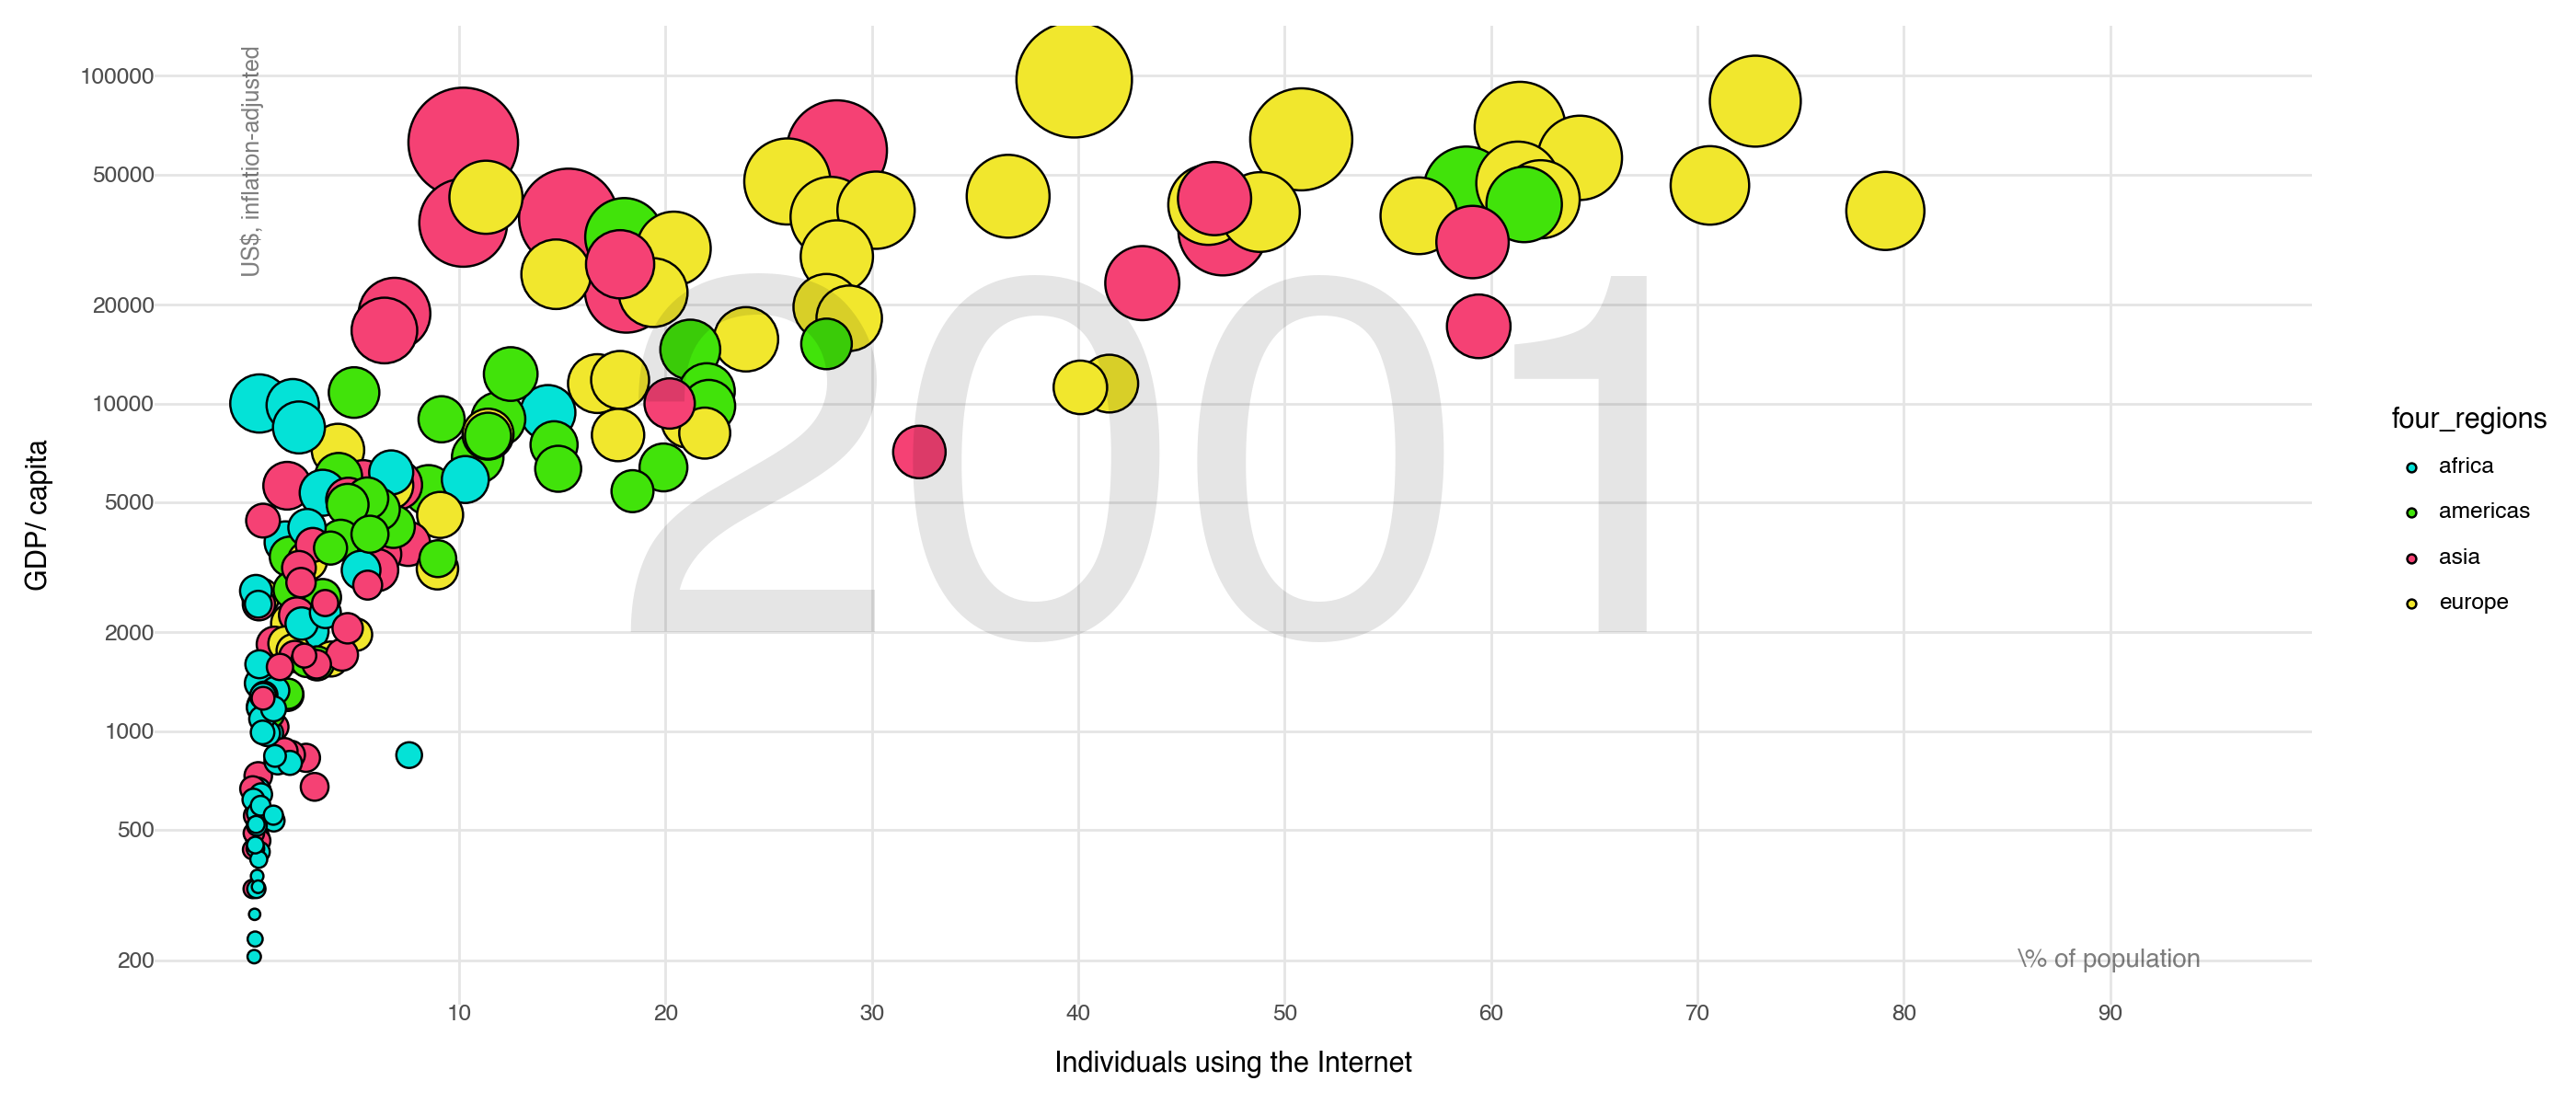

In [41]:
q3 = q3.sort_values(by='income', ascending=False)
q3= q3.dropna()
(ggplot(q3,

       aes(
         x='internet_users',
         y='gdp',
         size='income',
         fill='four_regions'
        
       ))
 + geom_point()
 + scale_size(range=(2, 25))
+ guides(size='none')
 #labels in corners
 + labs(x="Individuals using the Internet", y="GDP/ capita")
 + guides(size='none')
 + annotate("text", x=120, y=200, label="2001", size=200, color="black", alpha=.1)
 +theme_minimal()
 + theme(figure_size=(14,6), panel_grid_minor=element_blank())
 + scale_fill_manual(values=region_colors)
 + scale_x_continuous(breaks=[10,20,30,40,50,60,70,80,90], limits=(0, 95))
 + scale_y_log10(breaks=[200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000], limits=(200, 104000))
  + annotate("text", x=90, y=200, label="\% of population", size=10, color="black", alpha=.5)
  + annotate("text", x=0, y=55000, label="US$, inflation-adjusted", size=9, color="black", angle=90, alpha=.5)
  + annotate("text", x=45, y=5000, label="2001", size=200, color="black", alpha=.1)
 )